In [ ]:
#Brian K Liles
#Week Five Part 2 - Document Classification

In [ ]:
#Overview
'''It can be useful to be able to classify new "test" documents using already classified "training" documents.
A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new 
document is spam.'''

In [ ]:
#Goal
#For this assignment I will be using the **spam** data set, which was downloaded from www.kaggle.com

In [1]:
# Libraries
library(tidyverse)
library(pROC)
library(quanteda)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Package version: 1.3.4
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: 'quanteda'

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    View



In [ ]:
#Data 
'''Data was copied from **Kaggle** and added to the github page listed within the **read.csv** statement.

With the **tbl_df** statement from the **dplyr** package a data frame was created.'''

In [2]:
spam <- read.csv("https://raw.githubusercontent.com/LilesB/Data-620/master/spam.csv", header=TRUE, sep = ",", quote = '\"\"', stringsAsFactors=FALSE)

In [3]:
#Using the **glimpse** function from the **tidyverse** we will look at the **spam** dataset
glimpse(spam)

Observations: 5,572
Variables: 5
$ v1  <chr> "ham", "ham", "spam", "ham", "ham", "spam", "ham", "ham", "spam...
$ v2  <chr> "Go until jurong point, crazy.. Available only in bugis n great...
$ X   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",...
$ X.1 <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",...
$ X.2 <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",...


In [4]:
#Based off the information provided by the **glimpse** function, we will remove the last three variables.
spam <- spam %>%
    select(v1,v2)
glimpse(spam)

Observations: 5,572
Variables: 2
$ v1 <chr> "ham", "ham", "spam", "ham", "ham", "spam", "ham", "ham", "spam"...
$ v2 <chr> "Go until jurong point, crazy.. Available only in bugis n great ...


In [5]:
#Now we have a manageable data set with 5,572 observations and 2 variables to work with. Next, we will change the names of the columns.
colnames(spam) <- c("email","contents")
glimpse(spam)

Observations: 5,572
Variables: 2
$ email    <chr> "ham", "ham", "spam", "ham", "ham", "spam", "ham", "ham", ...
$ contents <chr> "Go until jurong point, crazy.. Available only in bugis n ...


In [6]:
#Next, we will use the **table** function to determine the tally of ham vs spam
cat("Frequency of Ham & Spam Emails","\n")
table(spam$email)

Frequency of Ham & Spam Emails 



 ham spam 
4825  747 

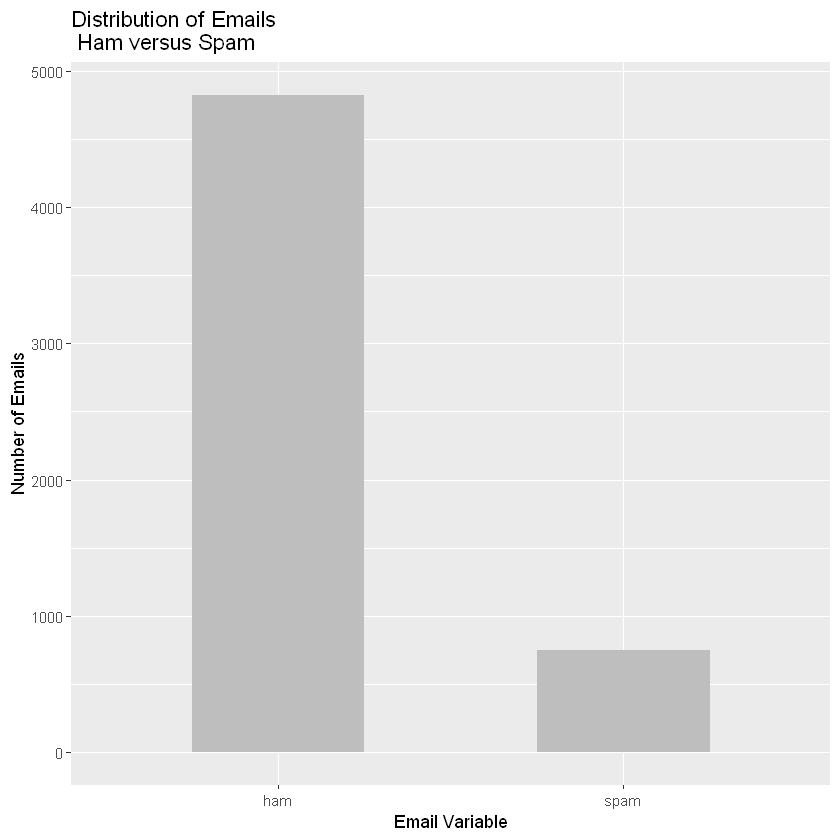

In [7]:
#To create a visual, we will utilize the **ggplot** package to view a bar chart of the data
ggplot(data = spam, aes(x = email)) +
  geom_bar(fill = "gray", width = 0.5) +
  xlab("Email Variable") +
  ylab("Number of Emails") +
  ggtitle("Distribution of Emails \n Ham versus Spam") 

In [8]:
#Training & Test Data Sets
spamTrain <- spam[1:4458,]
spamTest <- spam[4458:nrow(spam),]

In [13]:
# check the allocation of spam/no spam data for the training data set
table(spamTrain$email)
#Here we see that 3,856 ham emails and 602 spam emails 


 ham spam 
3856  602 

In [10]:
# check the allocation of spam/no spam data for the testing data set
table(spamTest$email)
#Here we see that 970 ham emails and 145 spam emails 


 ham spam 
 970  145 

In [11]:
##Naive Bayes Classifier
'''According to https://towardsdatascience.com/introduction-to-naive-bayes-classification-4cffabb1ae54 **Naive Bayes**
classifiers have been especially popular for text classification, and are a traditional solution for problems such as 
spam detection.'''
#With the **quanteda** package, our first step is to create a corpus based on the **content** column
# construct a corpus object based on data in the content column
contentCorpus <- corpus(spam$contents) 

ERROR: Error in parse(text = x, srcfile = src): <text>:2:3: unexpected string constant
3: classifiers have been especially popular for text classification, and are a traditional solution for problems such as 
4: spam detection.'
     ^


In [12]:
# assign value to the email column
docvars(contentCorpus) <- spam$email

ERROR: Error in docvars(contentCorpus) <- spam$email: object 'contentCorpus' not found


In [ ]:
#Next, we will create a document-feature matrix based off **contentCorpus**
dfm <- dfm(contentCorpus, tolower=TRUE)
# set the minimum and maximum frequencies 
dfm <- dfm_trim(dfm, min_docfreq = 3)
dfm <- dfm_weight(dfm)

In [ ]:
dfmTrain <- dfm[1:4458,]
dfmTest <- dfm[4458:nrow(spam),]

In [ ]:
#We can now run the Naive Bayes classifier
(naiveBayes <- textmodel_nb(dfmTrain,spamTrain[,1]))

In [ ]:
#Next, we will run a prediction utilizing the **predict** function
prediction <- predict(naiveBayes,dfmTest)

In [ ]:
#Next, using the **table** function we will view the predictions
table(prediction, actual = spamTest[,1])

In [ ]:
#Lastly, we will check the accuracy of the model by using the **pROC** package and also checking the accuracy of the test
mean(prediction == spamTest[,1])*100

In [ ]:
predictNum <- ifelse(prediction == "spam",1,2)
aucTest <- roc(as.factor(spamTest[,1]),predictNum)
plot(aucTest)